# 1. Prepare a model for glass classification using KNN

In [1]:
# Loading the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\mukes\OneDrive\Desktop\Data Science\Assignments\KNN\glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.shape

(214, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


There are no missing values

# Data Visualization

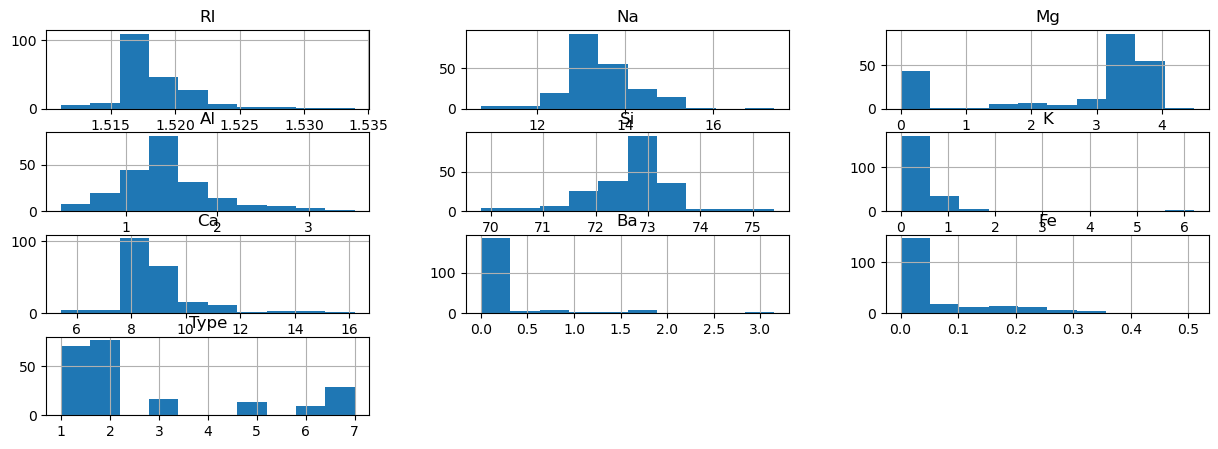

In [5]:
data.hist(figsize=(15,5))
plt.show()

None of the features are normally distributed.

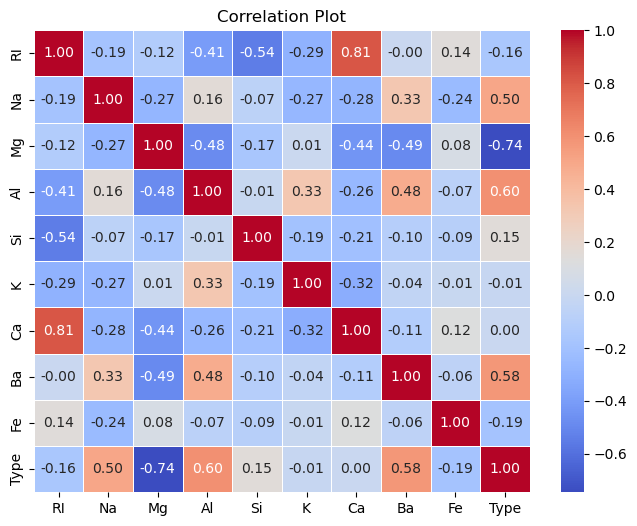

In [6]:
# Checking Correlation
data.corr()
correlation_matrix = data.corr()      # Creating a correlation matrix
plt.figure(figsize=(8, 6))        # Creating a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Plot")
plt.show()


# sns.heatmap() is used to create a heatmap of the correlation matrix. 
# The annot=True parameter displays the correlation values on the plot, and cmap specifies the color map.

# Hunting and Removing Outliers

In [7]:
from scipy import stats

z_threshold = 3.0

# Calculate Z-scores for each column (excluding the "Type" column)
z_scores = stats.zscore(data.drop("Type", axis=1))

# Identify outlier indices where Z-score exceeds the threshold
outlier_indices = (abs(z_scores) > z_threshold).any(axis=1)

# Drop rows corresponding to outlier indices and reset the DataFrame index
data = data[~outlier_indices].reset_index(drop=True)

# Print the new shape of the DataFrame
print(data.shape)

(194, 10)


# Splitting the Data into Input and Output Variable

In [8]:
X = data.drop(['Type'],axis=1)
y = data['Type']

In [9]:
# Importing necessary library
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#check the shape of X_train,X_test,y_train,y_test

X_train.shape,X_test.shape

((155, 9), (39, 9))

# Scaling the features

In [11]:
# Feature Scaling or Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# KNN Model Building

In [12]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [13]:
print("Number of samples in X_train:", X_train.shape[0])
print("Number of samples in y_train:", len(y_train))

Number of samples in X_train: 155
Number of samples in y_train: 155


In [14]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 5, 1, 1, 2, 2, 1, 2, 2, 7, 1, 3, 1, 6, 2, 1, 2, 7, 1, 2, 1,
       1, 3, 5, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 6, 2, 6, 2], dtype=int64)

# KNN Classifier Model Accuracy

## 1. Accuracy Score

In [15]:
# Evaluating the model
from sklearn.metrics import accuracy_score

############# Evaluation on Train Data #################
pred_train = knn.predict(X_train)
pd.crosstab(y_train, pred_train, rownames=['Actual'], colnames = ['Predictions']) 
print(accuracy_score(y_train, pred_train))

0.864516129032258


In [16]:
############# Evaluation on Test Data #################
pred = knn.predict(X_test)
pd.crosstab(y_test, pred, rownames = ['Actual'], colnames= ['Predictions']) 
print(accuracy_score(y_test, pred))

0.6666666666666666


In [17]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# print the scores on training and test set
#print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
#print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Model accuracy score: 0.6667


## Checking Accuracy Scores using different k-values

In [18]:
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)

# fit the model to the training set
knn_5.fit(X_train, y_train)

# predict on the test-set
y_pred_5 = knn_5.predict(X_test)

print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.7179


In [19]:
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)

# fit the model to the training set
knn_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k = 7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k = 7 : 0.6410


## 2. Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# using iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())

In [21]:
# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have a KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score for cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)  # Adjust cv (number of folds) as needed

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.5483871  0.61290323 0.74193548 0.67741935 0.67741935]
Mean Accuracy: 0.6516129032258065


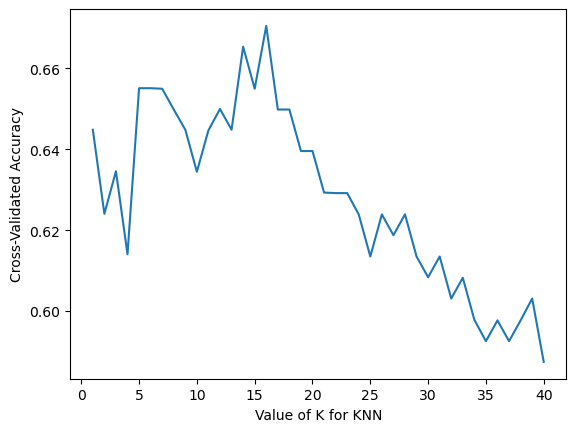

In [22]:
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

## 3. Confusion Matrix

In [23]:
# Print the Confusion Matrix with k =3 and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10  2  1  0  0  0]
 [ 5  9  1  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  1  0  0  0  2]]

True Positives(TP) =  10

True Negatives(TN) =  9

False Positives(FP) =  2

False Negatives(FN) =  5


## 4. Clasification Metrices

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.59      0.77      0.67        13
           2       0.69      0.60      0.64        15
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3

    accuracy                           0.67        39
   macro avg       0.71      0.67      0.68        39
weighted avg       0.67      0.67      0.66        39



Conclusion:
1. The average accuracy score of KNN Classifier Model using different methods at diferent hyperparameters is found to be under the interval of 0.64 to 0.71
2. Therefore, we can conclude saying that the Model is underfitting or the Model is not able to learn or perform on the training and testing data due to the less no. of data interms of rows or features and so the accuracy rate of the model is low having compared using different methods.


In [ ]:
cross tab:
1. Model Accuracy
2. Actual vs Predicted Accuracy
3. K-fold CV Scores